In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37865,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:43715,Total threads: 2
Dashboard: /proxy/39745/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:36249,


In [3]:
session = cc.database.create_session()

In [10]:
# set time period
start_time = '2160-01-01'
end_time = '2165-01-01'

In [11]:
# load control experiment
u_con = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='u', 
                          session=session, frequency='1 monthly',
                          start_time='1950-01-31 00:00:00', 
                          end_time='2179-12-31 00:00:00').sel(time = slice(start_time,end_time))

In [13]:
# load easterlies down experiment
u_down = cc.querying.getvar(expt='01deg_jra55v13_ryf9091_easterlies_down10', variable='u', 
                          session=session, frequency='1 monthly',
                          start_time='2150-01-31 00:00:00', 
                          end_time='2164-12-31 00:00:00').sel(time = slice(start_time,end_time))


In [14]:
# load easterlies down experiment
u_up = cc.querying.getvar(expt='01deg_jra55v13_ryf9091_easterlies_up10', variable='u', 
                          session=session, frequency='1 monthly',
                          start_time='2150-01-31 00:00:00', 
                          end_time='2164-12-31 00:00:00').sel(time = slice(start_time,end_time))

distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


In [15]:
u_con

,Array,Chunk
Bytes,162.94 GiB,3.20 MiB
Shape,"(60, 75, 2700, 3600)","(1, 7, 300, 400)"
Count,4972700 Tasks,53460 Chunks
Type,float32,numpy.ndarray


distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


In [16]:
# calculate the mean velocity
ucon = u_con.sel(yu_ocean = slice(-90,-50)).mean('time').load()
uup = u_up.sel(yu_ocean = slice(-90,-50)).mean('time').load()
udown = u_down.sel(yu_ocean = slice(-90,-50)).mean('time').load()

distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


In [19]:
#test
ucon1 = ucon.sel(st_ocean = 500, method = 'nearest')

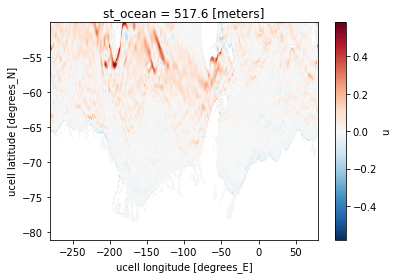

In [20]:
ucon1.plot()

In [23]:
# select transects
# control
ucon1 = ucon.sel(xu_ocean = -30, method = 'nearest')
ucon2 = ucon.sel(xu_ocean = 30, method = 'nearest')
ucon3 = ucon.sel(xu_ocean = 75, method = 'nearest')
ucon4 = ucon.sel(xu_ocean = -270, method = 'nearest')
ucon5 = ucon.sel(xu_ocean = -210, method = 'nearest')
ucon6 = ucon.sel(xu_ocean = -180, method = 'nearest')
ucon7 = ucon.sel(xu_ocean = -130, method = 'nearest')

# up10
uup1 = uup.sel(xu_ocean = -30, method = 'nearest')
uup2 = uup.sel(xu_ocean = 30, method = 'nearest')
uup3 = uup.sel(xu_ocean = 75, method = 'nearest')
uup4 = uup.sel(xu_ocean = -270, method = 'nearest')
uup5 = uup.sel(xu_ocean = -210, method = 'nearest')
uup6 = uup.sel(xu_ocean = -180, method = 'nearest')
uup7 = uup.sel(xu_ocean = -130, method = 'nearest')

# down10
udown1 = udown.sel(xu_ocean = -30, method = 'nearest')
udown2 = udown.sel(xu_ocean = 30, method = 'nearest')
udown3 = udown.sel(xu_ocean = 75, method = 'nearest')
udown4 = udown.sel(xu_ocean = -270, method = 'nearest')
udown5 = udown.sel(xu_ocean = -210, method = 'nearest')
udown6 = udown.sel(xu_ocean = -180, method = 'nearest')
udown7 = udown.sel(xu_ocean = -130, method = 'nearest')

Text(0, 0.5, 'zonal velocity (m/s)')

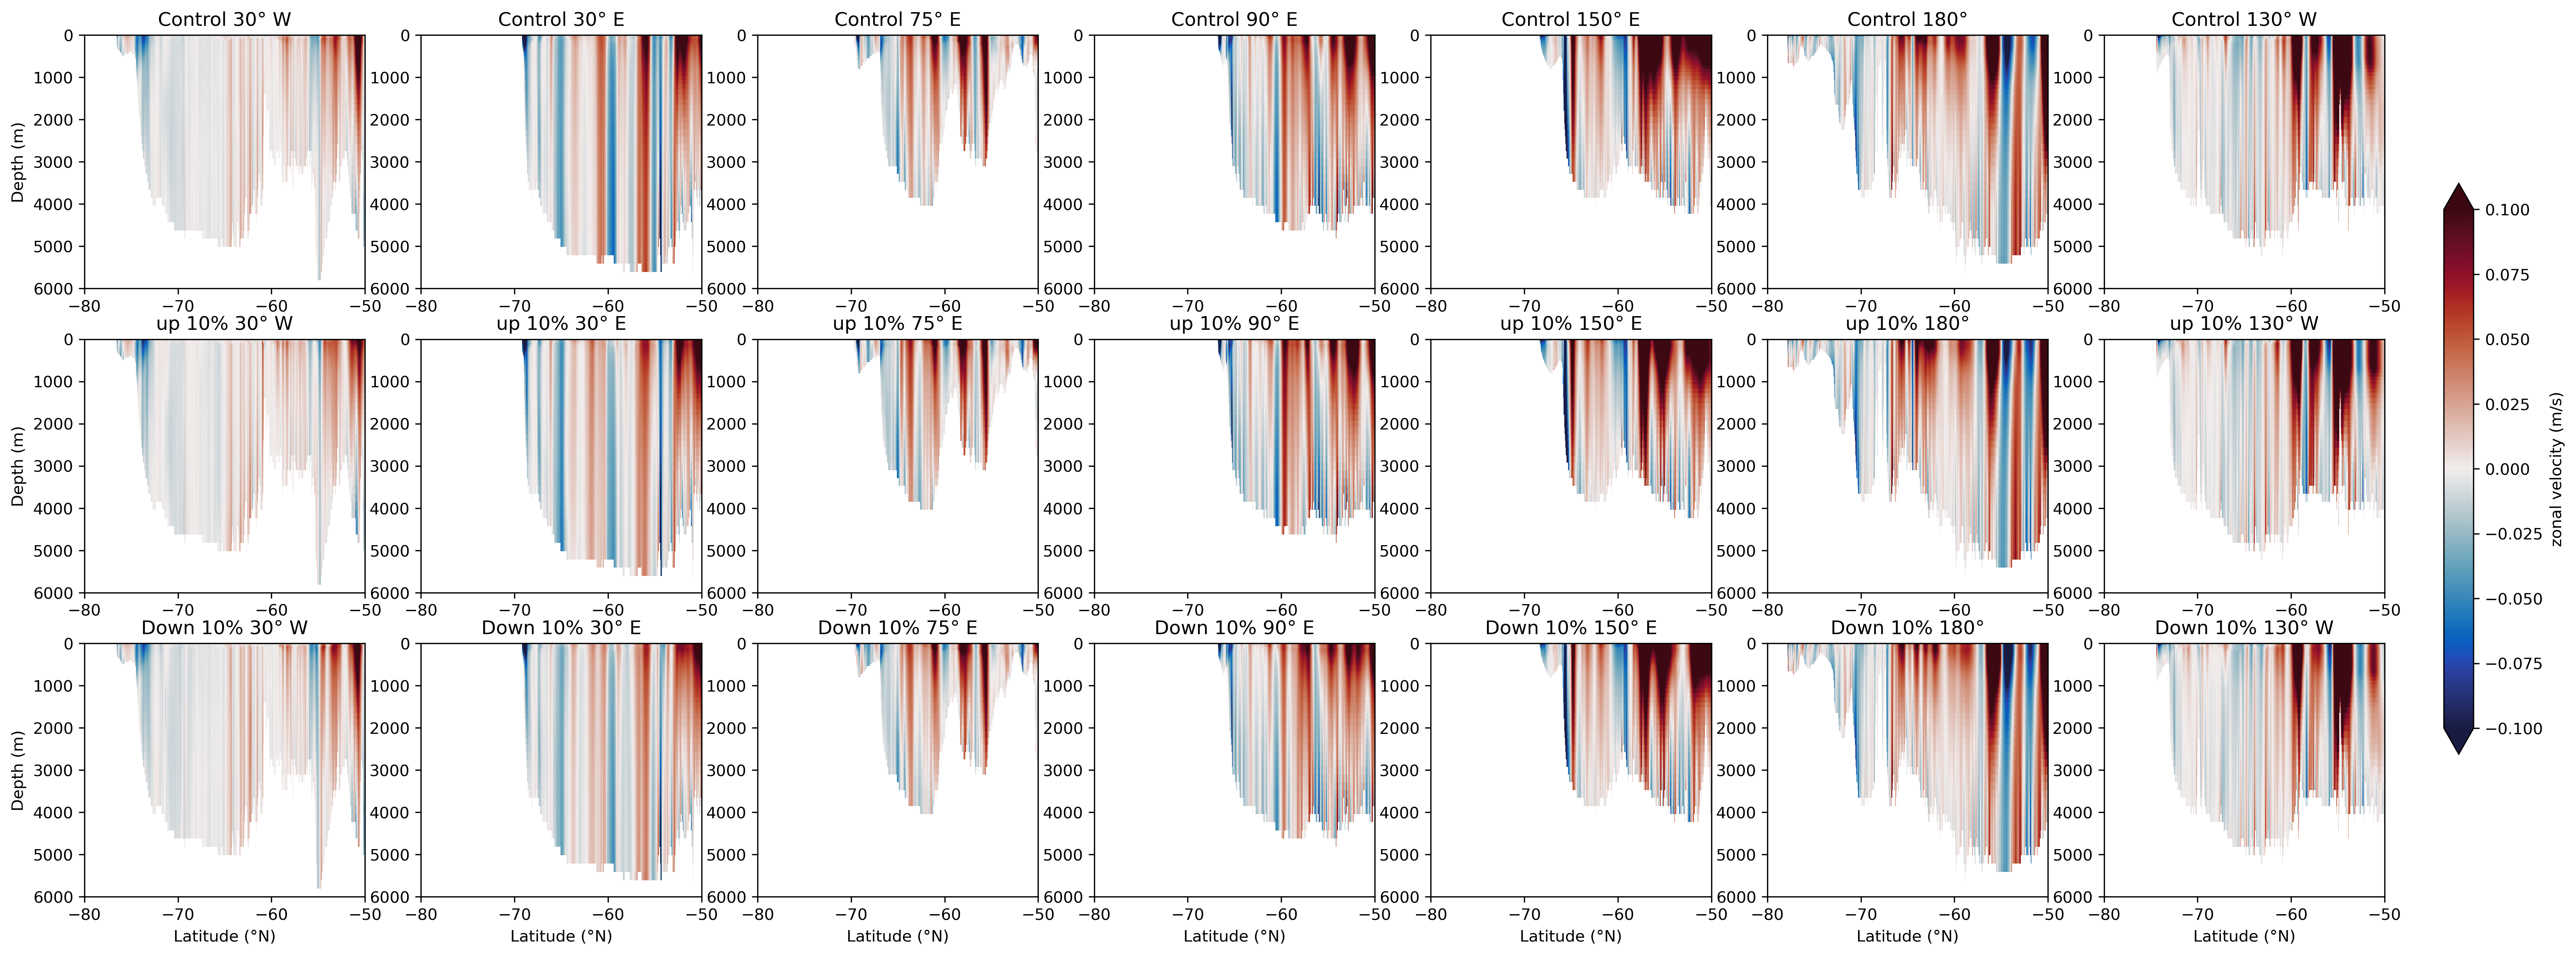

In [56]:
plt.figure(figsize=(26,10),dpi = 300)
# control
#30W
ax = plt.subplot(3,7,1)
p1 = ucon1.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('Depth (m)')
ax.set_title('Control 30° W')
#30E
ax = plt.subplot(3,7,2)
p1 = ucon2.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 30° E')
#75E
ax = plt.subplot(3,7,3)
p1 = ucon3.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 75° E')
#90E
ax = plt.subplot(3,7,4)
p1 = ucon4.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 90° E')
#150E
ax = plt.subplot(3,7,5)
p1 = ucon5.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 150° E')

#180
ax = plt.subplot(3,7,6)
p1 = ucon6.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 180°')

#130W
ax = plt.subplot(3,7,7)
p1 = ucon7.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('Control 130° W')

# up 10
#30W
ax = plt.subplot(3,7,8)
p1 = uup1.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('Depth (m)')
ax.set_title('up 10% 30° W')

# 30E
ax = plt.subplot(3,7,9)
p1 = uup2.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('up 10% 30° E')

# 75E
ax = plt.subplot(3,7,10)
p1 = uup3.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('up 10% 75° E')

# 90E
ax = plt.subplot(3,7,11)
p1 = uup4.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('up 10% 90° E')

# 150E
ax = plt.subplot(3,7,12)
p1 = uup5.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('up 10% 150° E')

# 180
ax = plt.subplot(3,7,13)
p1 = uup6.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('up 10% 180°')

# 130W
ax = plt.subplot(3,7,14)
p1 = uup7.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_title('up 10% 130° W')

# down 10
#30W
ax = plt.subplot(3,7,15)
p1 = udown1.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
plt.ylabel('Depth (m)')
ax.set_title('Down 10% 30° W')
plt.xlabel('Latitude (°N)')

#30E
ax = plt.subplot(3,7,16)
p1 = udown2.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('Down 10% 30° E')
plt.xlabel('Latitude (°N)')

#75E
ax = plt.subplot(3,7,17)
p1 = udown3.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('Down 10% 75° E')
plt.xlabel('Latitude (°N)')

#90E
ax = plt.subplot(3,7,18)
p1 = udown4.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('Down 10% 90° E')
plt.xlabel('Latitude (°N)')

#150E
ax = plt.subplot(3,7,19)
p1 = udown5.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('Down 10% 150° E')
plt.xlabel('Latitude (°N)')

#180
ax = plt.subplot(3,7,20)
p1 = udown6.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('Down 10% 180°')
plt.xlabel('Latitude (°N)')


#130W
ax = plt.subplot(3,7,21)
p1 = udown7.plot(vmin=-0.1,vmax = 0.1,cmap=cm.cm.balance, add_colorbar=False)
plt.ylim(0,6000)
plt.xlim(-80,-50)
plt.gca().invert_yaxis()
ax.set(ylabel=None)
ax.set_title('Down 10% 130° W')
plt.xlabel('Latitude (°N)')

# add colorbar
ax = plt.axes([0.92, 0.25, 0.01, 0.5])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('zonal velocity (m/s)')